In [2]:
%matplotlib inline

from __future__ import division
import igraph as ig
from datetime import datetime, timedelta
import itertools
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import os
import csv
import random
import glob
import re
import time
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter, HourLocator, DayLocator
import matplotlib.ticker as ticker
import random
import json
import cPickle as pickle
import cairo
from collections import defaultdict
import pyqt_fit.nonparam_regression as smooth
from pyqt_fit import npr_methods
import pyqt_fit.bootstrap as bs
from _pybgpstream import BGPStream, BGPRecord, BGPElem
from IPython.display import display
import sys
import fnmatch
import urllib, urllib2
from lxml import etree
from multiprocessing import Pool, cpu_count
import csv
import json
from urllib import urlencode, urlopen
from os import mkdir
from shutil import rmtree
import ijson
import bigjson
import sqlite3
import scipy.stats as stats
import importlib
from sklearn.metrics import mean_squared_error

## Reading the pickle file

In [3]:
start = time.time()

os.chdir("/your_directory_path/data/")

# updates_dic_unique_Indonesia.json
# updates_dic_Indonesia.json
with open('updates_dic_unique_Indonesia.json', 'rb') as fp:
    count_table = json.load(fp)
    
print 'time loading:', time.time() - start

time loading: 504.344572067


In [4]:
count_table['route-views.saopaulo'].keys()

[u'2014-03-30 23:33:07',
 u'2014-04-03 02:53:04',
 u'2014-04-03 11:39:18',
 u'2014-04-03 11:39:19',
 u'2014-04-03 18:32:57',
 u'2014-03-31 05:26:39',
 u'2014-03-31 05:26:38',
 u'2014-04-02 14:35:05',
 u'2014-04-02 20:30:56',
 u'2014-04-02 20:30:57',
 u'2014-04-02 20:30:54',
 u'2014-04-02 20:30:55',
 u'2014-04-02 20:30:52',
 u'2014-04-02 20:30:53',
 u'2014-04-02 20:30:50',
 u'2014-04-02 20:30:51',
 u'2014-04-02 20:30:58',
 u'2014-04-02 20:30:59',
 u'2014-04-02 14:35:04',
 u'2014-04-04 15:28:27',
 u'2014-04-04 09:28:29',
 u'2014-04-04 22:47:12',
 u'2014-04-04 06:35:04',
 u'2014-04-04 06:35:05',
 u'2014-04-04 06:35:06',
 u'2014-04-04 06:35:07',
 u'2014-04-04 06:35:00',
 u'2014-04-04 06:35:01',
 u'2014-04-04 06:35:02',
 u'2014-04-04 06:35:03',
 u'2014-04-01 23:37:09',
 u'2014-04-04 06:35:08',
 u'2014-04-04 06:35:09',
 u'2014-03-30 23:33:03',
 u'2014-04-04 09:28:28',
 u'2014-04-01 21:22:07',
 u'2014-04-01 23:55:42',
 u'2014-04-02 08:45:37',
 u'2014-03-30 23:33:02',
 u'2014-04-03 07:25:05',


# Announcements

## Indosat

In [5]:
# To get the data coming form the hijacker

start = time.time()

dic = defaultdict(list)
asn_of_interest = '4761'

for key_collector in sorted(count_table):
    # print key_collector
    for key_date in sorted(count_table[key_collector]):
        if asn_of_interest in count_table[key_collector][key_date]: 
            dic[key_collector].append([datetime.strptime(key_date, '%Y-%m-%d %H:%M:%S'), count_table[key_collector][key_date][asn_of_interest][0], count_table[key_collector][key_date][asn_of_interest][1]])
            
print 'time loading:', time.time() - start

time loading: 11.312898159


## Get a sense of the structure of the data

In [6]:
print dic.keys()
collector = 'route-views.linx'
print dic[collector][:2]
print dic[collector][-2:]

[u'route-views.saopaulo', u'route-views.isc', u'route-views.wide', u'route-views.soxrs', u'route-views.jinx', u'route-views.nwax', u'route-views.telxatl', u'route-views3', u'route-views2', u'route-views.eqix', u'route-views.sydney', u'route-views.linx', u'route-views6', u'route-views4']
[[datetime.datetime(2014, 3, 30, 16, 13, 4), 1, 0], [datetime.datetime(2014, 3, 30, 16, 13, 8), 1, 0]]
[[datetime.datetime(2014, 4, 5, 19, 2, 10), 1, 0], [datetime.datetime(2014, 4, 5, 20, 52, 15), 51, 0]]


## ROC/PRC

## Ranking based on number of feeders

In [13]:
# Load the dictionary of knowledge
with open("dic_feeders_evolution_Indonesia.p", "rb") as fp:
    evolution_dic = pickle.load(fp)

## Ranking based on the number of Routers

In [14]:
# Time at which the ranking is done
reference_time = "2014-03-31 00:00:00"
new_dic = {}

for collector in evolution_dic:
    new_dic[collector] = len(set(np.array(evolution_dic[collector][reference_time])[:,1])) # ASes are index 0, routers are 1
    
number_of_feeders = sorted(new_dic, key=lambda k: new_dic[k], reverse=True) # Sort collectors in increasing order
number_of_feeders = ['route-views' + feed if (feed == '2' or feed == '3' or feed == '4' or feed == '6') else 'route-views.' + feed for feed in number_of_feeders]
print number_of_feeders

['route-views.linx', 'route-views.saopaulo', 'route-views4', 'route-views2', 'route-views.eqix', 'route-views6', 'route-views.isc', 'route-views3', 'route-views.sydney', 'route-views.jinx', 'route-views.telxatl', 'route-views.nwax', 'route-views.wide', 'route-views.perth', 'route-views.kixp', 'route-views.soxrs']


## Unique updates by collector

route-views.linx
route-views.saopaulo
route-views4
route-views2
route-views.eqix
route-views6
route-views.isc
route-views3
route-views.sydney
route-views.jinx
route-views.telxatl
route-views.nwax
route-views.wide
route-views.perth
route-views.kixp
route-views.soxrs


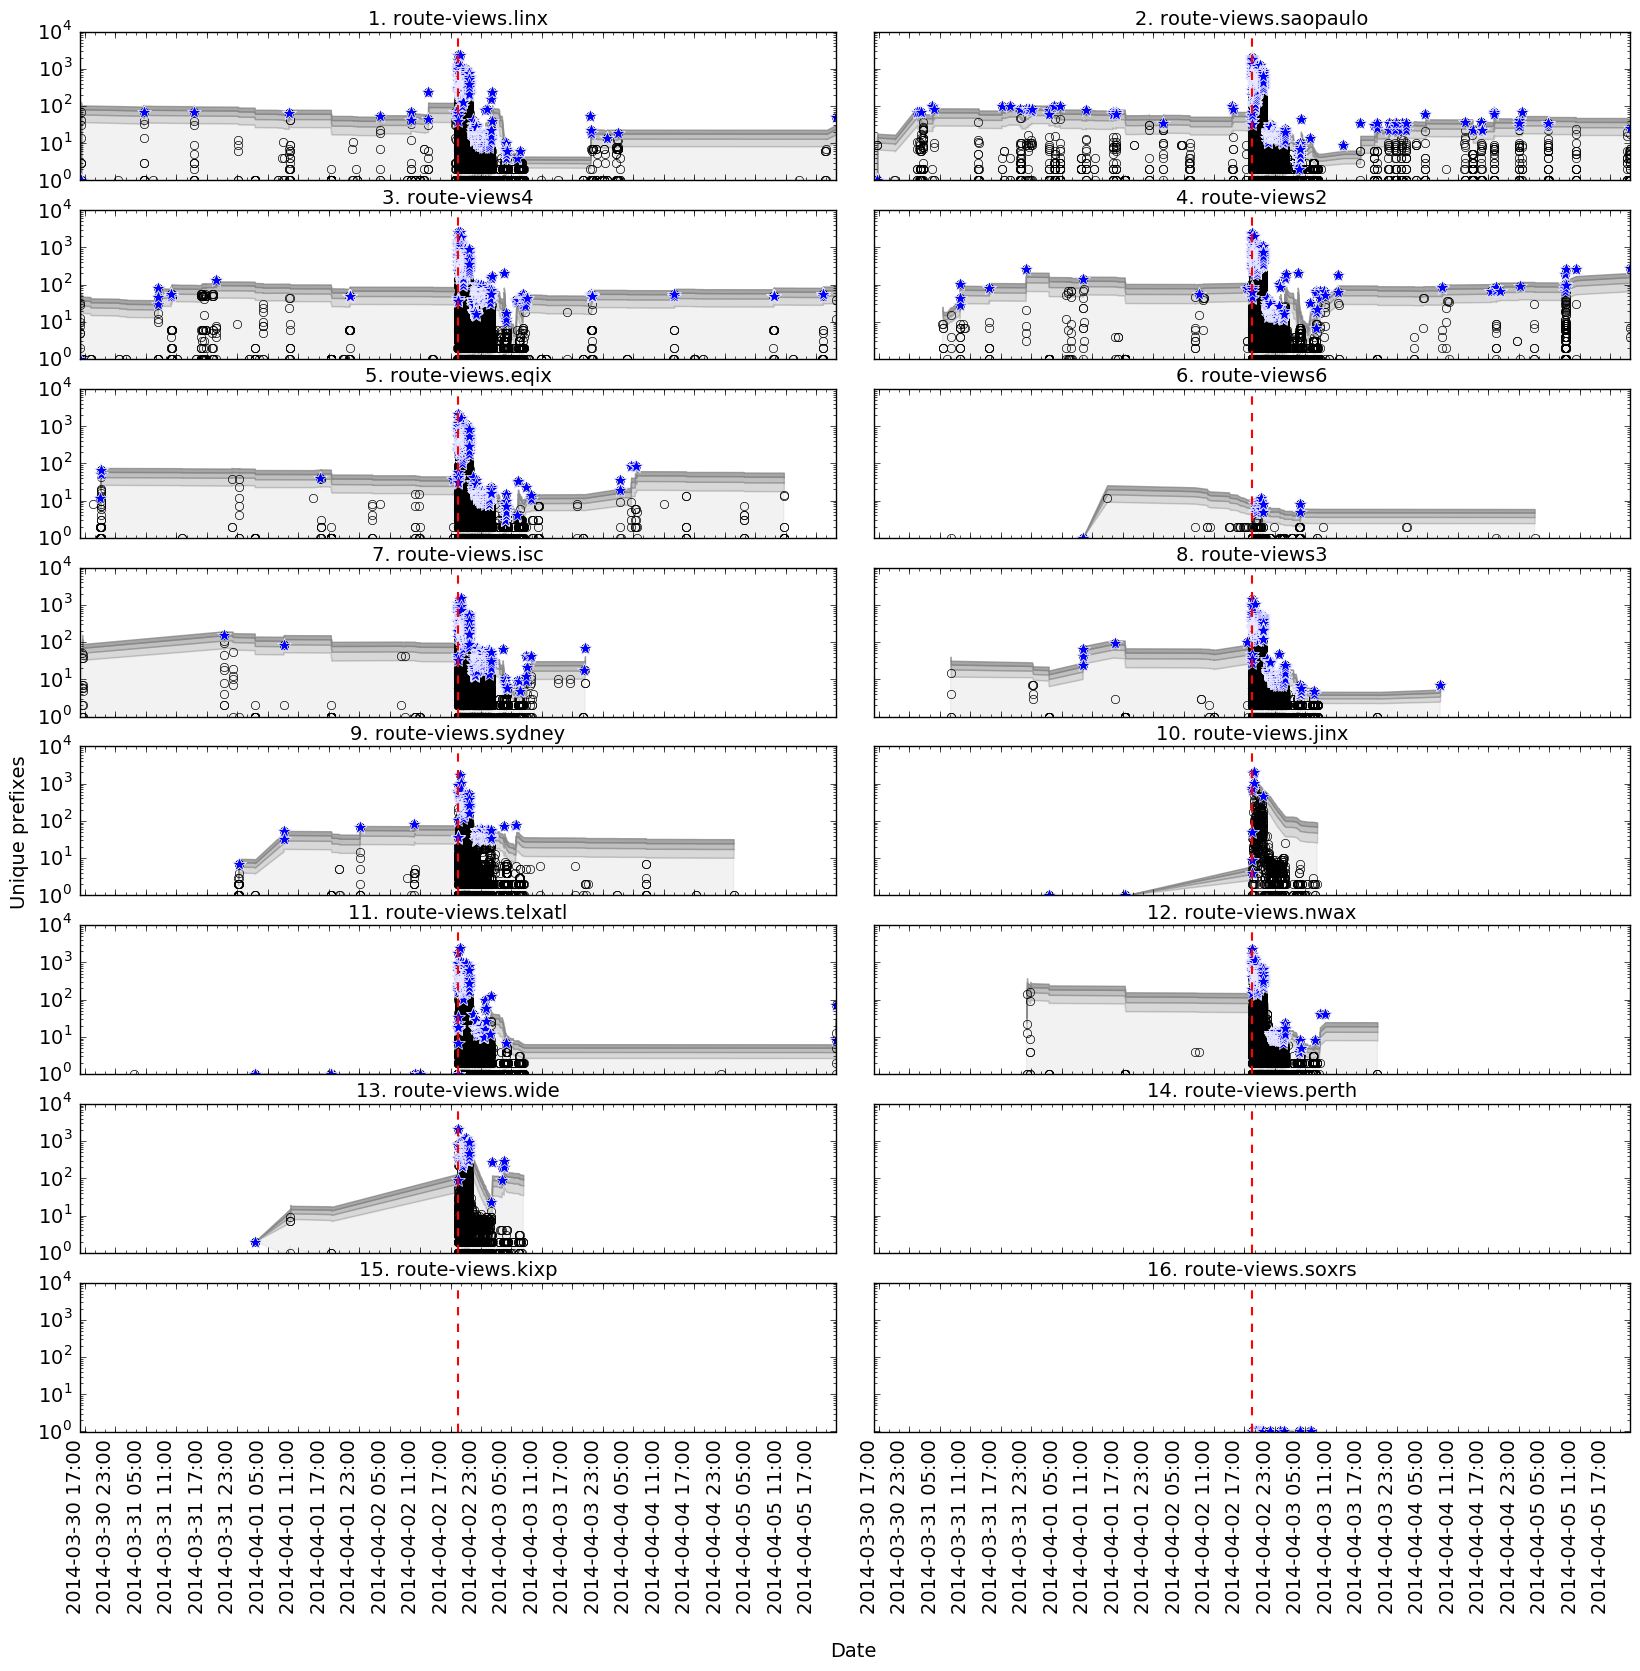

In [15]:
list_collectors = number_of_feeders

if len(list_collectors) % 2 != 0: # Odd
    row = int(len(list_collectors)/2) + 1
else: # Even
    row = int(len(list_collectors)/2)
col = 2

fig, axes = plt.subplots(row, col, sharex=True, sharey=True) 
fig.subplots_adjust(hspace=0.2, wspace=0.05)

count = 0

for collector in list_collectors: #final_dic:
    
    print collector

    index_x = int(count/2)
    if count % 2 == 0:
        index_y = 0
    else:
        index_y = 1

    # print index_x, index_y
    ax = axes[index_x, index_y] 
    ax.set_title(str(count + 1) + '. ' + collector, fontsize=14) 
        
    if dic[collector] != []:

        x = np.array(dic[collector])[:,0]
        y = np.array(dic[collector])[:,1]

        ax.plot(x, y, linestyle="None", marker="o", mfc="None", markeredgecolor="black", label="Data")
        ax.set_yscale("log")
        
        # Convert data in time series for calculations
        s = pd.Series(y, index=x)

        window_length = 200
        mean = s.ewm(span=window_length, min_periods=1).mean()
        sd = s.ewm(span=window_length, min_periods=1).std()
        
        array_means = mean.values
        array_stds = sd.values
        
        # Band scale
        sigma = 1.0
        ax.fill_between(x, array_means - sigma*array_stds, array_means + sigma*array_stds, color="gray", alpha=0.10)

        ax.fill_between(x, array_means + sigma*array_stds, array_means + 2*sigma*array_stds, color="gray", alpha=0.30)
        # ax.fill_between(x, array_means - sigma*array_stds, array_means - 2*sigma*array_stds, color="gray", alpha=0.30)

        ax.fill_between(x, array_means + 2*sigma*array_stds, array_means + 3*sigma*array_stds, color="gray", alpha=0.50)
        # ax.fill_between(x, array_means - 2*sigma*array_stds, array_means - 3*sigma*array_stds, color="gray", alpha=0.50)

        ax.fill_between(x, array_means + 3*sigma*array_stds, array_means + 4*sigma*array_stds, color="gray", alpha=0.70)
        # ax.fill_between(x, array_means - 3*sigma*array_stds, array_means - 4*sigma*array_stds, color="gray", alpha=0.70)

        anomalies_index = (y >= (mean + 2*sigma*sd)).values
        
        # To avaoid null cases
        if len(x[anomalies_index]) > 0:
            ax.plot(x[anomalies_index], y[anomalies_index], linestyle="None", marker="*", mfc="blue", markeredgecolor="white", markersize=10)  


    # Assign font size
    for label in ([ax.xaxis.label, ax.yaxis.label]):
        label.set_fontsize(14)

    # x axis
    for tl in ax.get_xticklabels():
        tl.set_fontsize(14)

    # y axis
    for tl in ax.get_yticklabels():
        tl.set_fontsize(14)

    # Change ticks space
    ax.tick_params(axis="both", which="major", pad=5)  

    
    ax.set_ylim(bottom=1)
    ax.set_ylim(auto=True)

    ax.xaxis.set_major_locator(dates.HourLocator(byhour=None, interval=6, tz=None))
    ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m-%d %H:%M"))
    ax.xaxis.set_minor_locator(dates.HourLocator(byhour=None, interval=2, tz=None))

    ax.axvline(x=datetime(2014, 4, 2, 18, 26, 0), color='red', linestyle='--', linewidth=1.5)

    count += 1

fig.autofmt_xdate(rotation=90) 
    
fig.text(0.5, 0.09, 'Date', va="center", rotation="horizontal", fontsize=14)
fig.text(0.09, 0.5, 'Unique prefixes', va="center", rotation="vertical", fontsize=14)

# fit subplots and save fig
size = 20
fig.set_size_inches(w=size, h=1.0*size) # size/1.618

if len(list_collectors) % 2 != 0:
    ax = axes[int(len(list_collectors)/2), 1]
    ax.set_visible(False)
    
    
plt.show()

## Get the four more significant views

route-views.linx
route-views.saopaulo
route-views4
route-views2


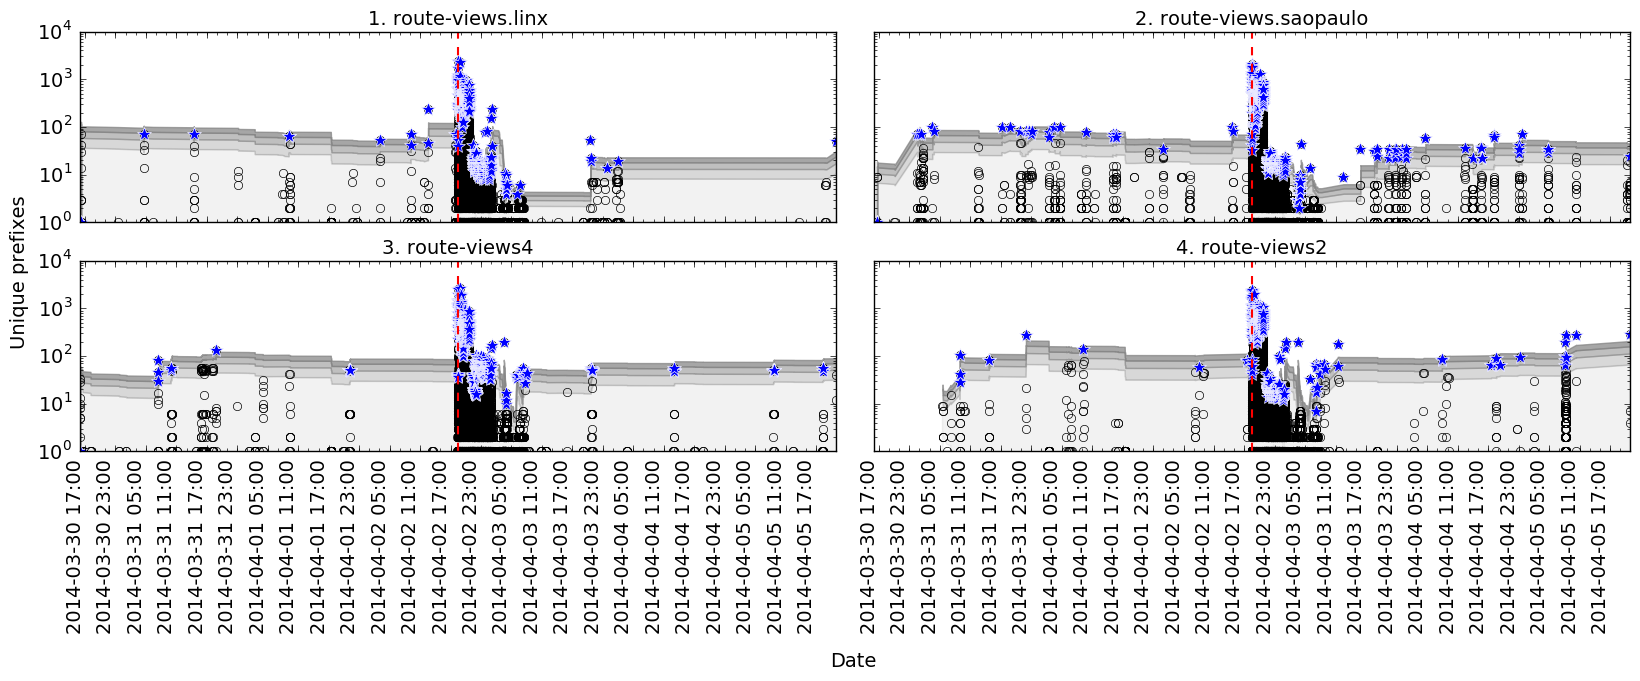

In [17]:
list_collectors = number_of_feeders[:4]

if len(list_collectors) % 2 != 0: # Odd
    row = int(len(list_collectors)/2) + 1
else: # Even
    row = int(len(list_collectors)/2)
col = 2

fig, axes = plt.subplots(row, col, sharex=True, sharey=True) 
fig.subplots_adjust(hspace=0.2, wspace=0.05)

count = 0

for collector in list_collectors: #final_dic:
    
    print collector

    index_x = int(count/2)
    if count % 2 == 0:
        index_y = 0
    else:
        index_y = 1

    # print index_x, index_y
    ax = axes[index_x, index_y] 
    ax.set_title(str(count + 1) + '. ' + collector, fontsize=14) 
        
    if dic[collector] != []:

        x = np.array(dic[collector])[:,0]
        y = np.array(dic[collector])[:,1]

        ax.plot(x, y, linestyle="None", marker="o", mfc="None", markeredgecolor="black", label="Data")
        ax.set_yscale("log")
        
        # Conver data in time series for calculations
        s = pd.Series(y, index=x)

        window_length = 200
        mean = s.ewm(span=window_length, min_periods=1).mean()
        sd = s.ewm(span=window_length, min_periods=1).std()
        
        array_means = mean.values
        array_stds = sd.values
        
        # Band scale
        sigma = 1.0
        ax.fill_between(x, array_means - sigma*array_stds, array_means + sigma*array_stds, color="gray", alpha=0.10)

        ax.fill_between(x, array_means + sigma*array_stds, array_means + 2*sigma*array_stds, color="gray", alpha=0.30)
        # ax.fill_between(x, array_means - sigma*array_stds, array_means - 2*sigma*array_stds, color="gray", alpha=0.30)

        ax.fill_between(x, array_means + 2*sigma*array_stds, array_means + 3*sigma*array_stds, color="gray", alpha=0.50)
        # ax.fill_between(x, array_means - 2*sigma*array_stds, array_means - 3*sigma*array_stds, color="gray", alpha=0.50)

        ax.fill_between(x, array_means + 3*sigma*array_stds, array_means + 4*sigma*array_stds, color="gray", alpha=0.70)
        # ax.fill_between(x, array_means - 3*sigma*array_stds, array_means - 4*sigma*array_stds, color="gray", alpha=0.70)

        anomalies_index = (y >= (mean + 2*sigma*sd)).values
        
        # To avaoid null cases
        if len(x[anomalies_index]) > 0:
            ax.plot(x[anomalies_index], y[anomalies_index], linestyle="None", marker="*", mfc="blue", markeredgecolor="white", markersize=10)  


    # Assign font size
    for label in ([ax.xaxis.label, ax.yaxis.label]):
        label.set_fontsize(14)

    # x axis
    for tl in ax.get_xticklabels():
        tl.set_fontsize(14)

    # y axis
    for tl in ax.get_yticklabels():
        tl.set_fontsize(14)

    # Change ticks space
    ax.tick_params(axis="both", which="major", pad=5)  

    ax.set_ylim(bottom=1)
    ax.set_ylim(auto=True)

    ax.xaxis.set_major_locator(dates.HourLocator(byhour=None, interval=6, tz=None))
    ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m-%d %H:%M"))
    ax.xaxis.set_minor_locator(dates.HourLocator(byhour=None, interval=2, tz=None))

    ax.axvline(datetime(2014, 4, 2, 18, 26, 0), color='red', linewidth=1.5, linestyle='--')

    count += 1

fig.autofmt_xdate(rotation=90) 
    

fig.text(0.5, -0.15, 'Date', va="center", rotation="horizontal", fontsize=14)
fig.text(0.09, 0.5, 'Unique prefixes', va="center", rotation="vertical", fontsize=14)

# fit subplots and save fig
size = 20
fig.set_size_inches(w=size, h=0.3*size) # size/1.618

if len(list_collectors) % 2 != 0:
    ax = axes[int(len(list_collectors)/2), 1]
    ax.set_visible(False)
    
plt.show()

## Figure for the paper

route-views.linx
rmse:  81.3654255316
route-views.saopaulo
rmse:  105.872853665
route-views4
rmse:  95.8319020028
route-views2
rmse:  115.331790358


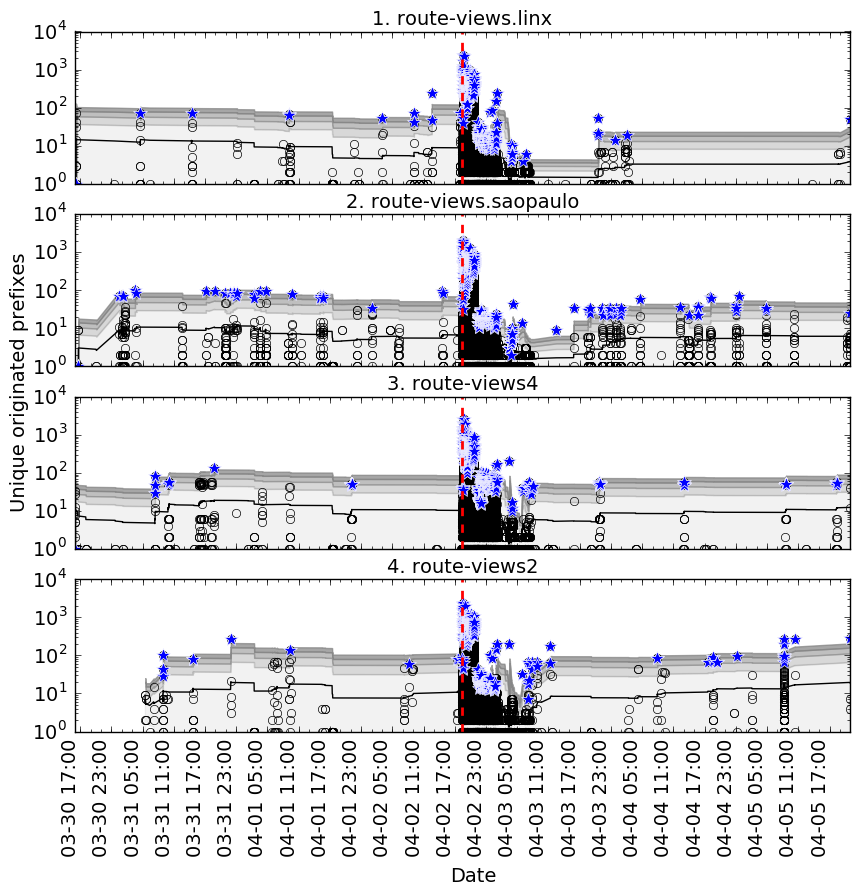

In [18]:
list_collectors = number_of_feeders[:4]

row = len(list_collectors)
col = 1

fig, axes = plt.subplots(row, col, sharex=True, sharey=True) 
fig.subplots_adjust(hspace=0.2, wspace=0.05)

count = 0

for collector in list_collectors: #final_dic:
    
    print collector

#     index_x = int(count/2)
#     if count % 2 == 0:
#         index_y = 0
#     else:
#         index_y = 1

    # print index_x, index_y
    # print count
    ax = axes[count] 
    ax.set_title(str(count + 1) + '. ' + collector, fontsize=14) 
        
    if dic[collector] != []:

        x = np.array(dic[collector])[:,0]
        y = np.array(dic[collector])[:,1]

        ax.plot(x, y, linestyle="None", marker="o", mfc="None", markeredgecolor="black", label="Data")
        ax.set_yscale("log")
        
        # Convert data in time series for calculations
        s = pd.Series(y, index=x)

        window_length = 200
        mean = s.ewm(span=window_length, min_periods=1).mean()
        sd = s.ewm(span=window_length, min_periods=1).std()
        
        array_means = mean.values
        array_stds = sd.values
        
        ax.plot(x, array_means, color="black", linewidth=1.0)
        print 'rmse: ', np.sqrt(mean_squared_error(y, array_means))
        
        # Band scale
        sigma = 1.0
        ax.fill_between(x, array_means - sigma*array_stds, array_means + sigma*array_stds, color="gray", alpha=0.10)

        ax.fill_between(x, array_means + sigma*array_stds, array_means + 2*sigma*array_stds, color="gray", alpha=0.30)
        # ax.fill_between(x, array_means - sigma*array_stds, array_means - 2*sigma*array_stds, color="gray", alpha=0.30)

        ax.fill_between(x, array_means + 2*sigma*array_stds, array_means + 3*sigma*array_stds, color="gray", alpha=0.50)
        # ax.fill_between(x, array_means - 2*sigma*array_stds, array_means - 3*sigma*array_stds, color="gray", alpha=0.50)

        ax.fill_between(x, array_means + 3*sigma*array_stds, array_means + 4*sigma*array_stds, color="gray", alpha=0.70)
        # ax.fill_between(x, array_means - 3*sigma*array_stds, array_means - 4*sigma*array_stds, color="gray", alpha=0.70)

        anomalies_index = (y >= (mean + 2*sigma*sd)).values
    
        # To avaoid null cases
        if len(x[anomalies_index]) > 0:
            ax.plot(x[anomalies_index], y[anomalies_index], linestyle="None", marker="*", mfc="blue", markeredgecolor="white", markersize=10)  


    # Assign font size
    for label in ([ax.xaxis.label, ax.yaxis.label]):
        label.set_fontsize(14)

    # x axis
    for tl in ax.get_xticklabels():
        tl.set_fontsize(14)

    # y axis
    for tl in ax.get_yticklabels():
        tl.set_fontsize(14)

    # Change ticks space
    ax.tick_params(axis="both", which="major", pad=5)  

    ax.set_ylim(auto=True)
    ax.set_ylim(bottom=1)
    
    

    ax.xaxis.set_major_locator(dates.HourLocator(byhour=None, interval=6, tz=None))
    ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%d %H:%M"))
    ax.xaxis.set_minor_locator(dates.HourLocator(byhour=None, interval=2, tz=None))

    ax.axvline(datetime(2014, 4, 2, 18, 26, 0), color='red', linewidth=2.0, linestyle='--')

    count += 1

fig.autofmt_xdate(rotation=90) 
    

fig.text(0.5, 0.055, 'Date', va="center", rotation="horizontal", fontsize=14)
fig.text(0.06, 0.55, 'Unique originated prefixes', va="center", rotation="vertical", fontsize=14)

# fit subplots and save fig
size = 10
fig.set_size_inches(w=size, h=1.0*size) # size/1.618

if len(list_collectors) % 2 != 0:
    ax = axes[int(len(list_collectors)/2), 1]
    ax.set_visible(False)
    
    
plt.show()

## Remaining collectors

route-views.eqix
rmse:  79.4419261688
route-views6
rmse:  1.36119123838
route-views.isc
rmse:  52.7206584165
route-views3
rmse:  56.2280376201
route-views.sydney
rmse:  61.5082565866
route-views.jinx
rmse:  135.327470706
route-views.telxatl
rmse:  72.6373076302
route-views.nwax
rmse:  92.4370963839
route-views.wide
rmse:  113.041263965
route-views.perth
route-views.kixp
route-views.soxrs
rmse:  0.0


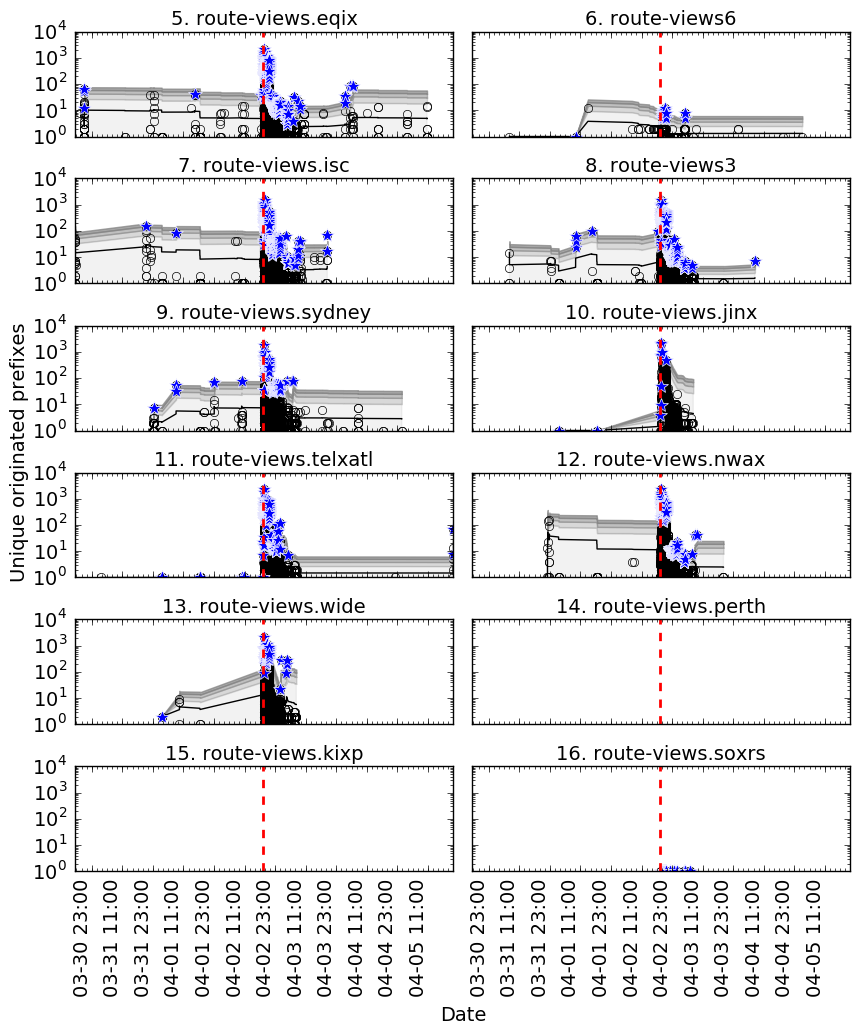

In [22]:
list_collectors = number_of_feeders[4:]

if len(list_collectors) % 2 != 0: # Odd
    row = int(len(list_collectors)/2) + 1
else: # Even
    row = int(len(list_collectors)/2)
col = 2

fig, axes = plt.subplots(row, col, sharex=True, sharey=True) 
fig.subplots_adjust(hspace=0.4, wspace=0.05)

count = 0

for collector in list_collectors: #final_dic:
    
    print collector

    index_x = int(count/2)
    if count % 2 == 0:
        index_y = 0
    else:
        index_y = 1

    ax = axes[index_x, index_y] 
    ax.set_title(str(count + 5) + '. ' + collector, fontsize=14) 
        
    if dic[collector] != []:

        x = np.array(dic[collector])[:,0]
        y = np.array(dic[collector])[:,1]

        ax.plot(x, y, linestyle="None", marker="o", mfc="None", markeredgecolor="black", label="Data")
        ax.set_yscale("log")
        
        # Conver data in time series for calculations
        s = pd.Series(y, index=x)

        window_length = 200
        mean = s.ewm(span=window_length, min_periods=1).mean()
        sd = s.ewm(span=window_length, min_periods=1).std()
        
        array_means = mean.values
        array_stds = sd.values
        
        ax.plot(x, array_means, color="black", linewidth=1.0)
        print 'rmse: ', np.sqrt(mean_squared_error(y, array_means))
        
        # Band scale
        sigma = 1.0
        ax.fill_between(x, array_means - sigma*array_stds, array_means + sigma*array_stds, color="gray", alpha=0.10)

        ax.fill_between(x, array_means + sigma*array_stds, array_means + 2*sigma*array_stds, color="gray", alpha=0.30)
        # ax.fill_between(x, array_means - sigma*array_stds, array_means - 2*sigma*array_stds, color="gray", alpha=0.30)

        ax.fill_between(x, array_means + 2*sigma*array_stds, array_means + 3*sigma*array_stds, color="gray", alpha=0.50)
        # ax.fill_between(x, array_means - 2*sigma*array_stds, array_means - 3*sigma*array_stds, color="gray", alpha=0.50)

        ax.fill_between(x, array_means + 3*sigma*array_stds, array_means + 4*sigma*array_stds, color="gray", alpha=0.70)
        # ax.fill_between(x, array_means - 3*sigma*array_stds, array_means - 4*sigma*array_stds, color="gray", alpha=0.70)

        anomalies_index = (y >= (mean + 2*sigma*sd)).values
        
        # To avaoid null cases
        if len(x[anomalies_index]) > 0:
            ax.plot(x[anomalies_index], y[anomalies_index], linestyle="None", marker="*", mfc="blue", markeredgecolor="white", markersize=10)  

            

    # Assign font size

    # Assign font size
    for label in ([ax.xaxis.label, ax.yaxis.label]):
        label.set_fontsize(14)

    # x axis
    for tl in ax.get_xticklabels():
        tl.set_fontsize(14)

    # y axis
    for tl in ax.get_yticklabels():
        tl.set_fontsize(14)

    # Change ticks space
    ax.tick_params(axis="both", which="major", pad=5)  

    ax.set_ylim(auto=True)
    ax.set_ylim(bottom=1)

    ax.xaxis.set_major_locator(dates.HourLocator(byhour=None, interval=12, tz=None))
    ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%d %H:%M"))
    ax.xaxis.set_minor_locator(dates.HourLocator(byhour=None, interval=2, tz=None))
   
    ax.axvline(datetime(2014, 4, 2, 18, 26, 0), color='red', linewidth=2.0, linestyle='--')


    count += 1

plt.setp(ax.xaxis.get_majorticklabels(), ha="right")
fig.autofmt_xdate(rotation=90) 

fig.text(0.49, 0.08, 'Date', va="center", rotation="horizontal", fontsize=14)
fig.text(0.06, 0.55, 'Unique originated prefixes', va="center", rotation="vertical", fontsize=14)

# fit subplots and save fig
size = 10
fig.set_size_inches(w=size, h=1.2*size) # size/1.618

if len(list_collectors) % 2 != 0:
    ax = axes[int(len(list_collectors)/2), 1]
    ax.set_visible(False)
        
plt.show()

## Q time series

## Q series set the four more significant

route-views.linx
route-views.saopaulo
route-views4
route-views2


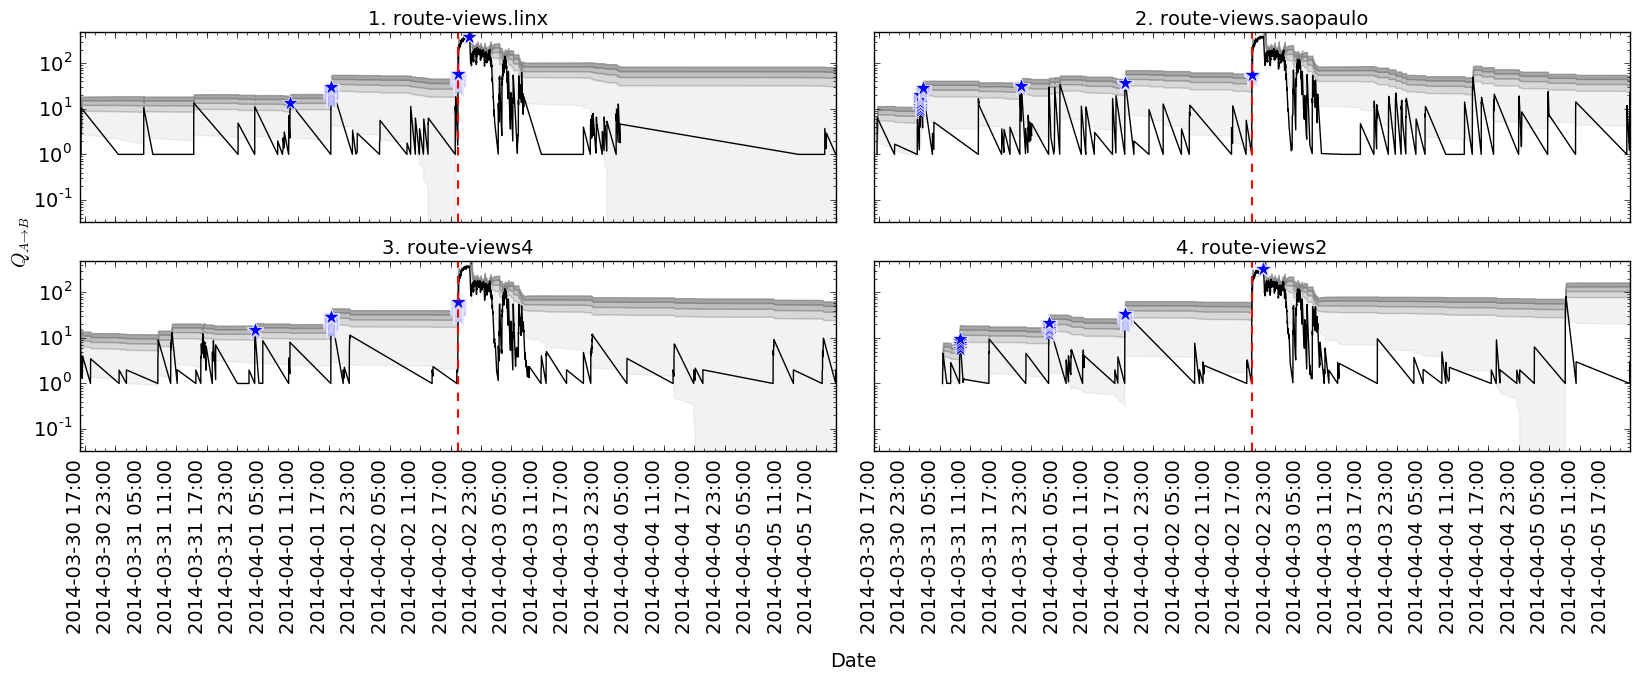

In [27]:
list_collectors = number_of_feeders[:4]

if len(list_collectors) % 2 != 0: # Odd
    row = int(len(list_collectors)/2) + 1
else: # Even
    row = int(len(list_collectors)/2)
col = 2

fig, axes = plt.subplots(row, col, sharex=True, sharey=True) 
fig.subplots_adjust(hspace=0.2, wspace=0.05)

count = 0

for collector in list_collectors: #final_dic:
    
    print collector

    index_x = int(count/2)
    if count % 2 == 0:
        index_y = 0
    else:
        index_y = 1

    # print index_x, index_y
    ax = axes[index_x, index_y] 
    ax.set_title(str(count + 1) + '. ' + collector, fontsize=14) 
    
    if dic[collector] != []:

        time_array = np.array(dic[collector])[:,0]

        q = 0
        r = 1/300 # 0.05, 0.01
        q_array = []
        delta_array = []

        for index in range(1, len(time_array)):
            delta = (time_array[index] - time_array[index-1]).seconds
            # print delta
            delta_array.append(delta)
            exponential_term = (2**(-r*delta))*q
            q = 1 + exponential_term
            q_array.append(q)

        delta_array = np.array(delta_array)
        # print np.max(delta_array), np.min(delta_array)

        q_array = np.array(q_array)
        # print np.max(q_array), np.min(q_array)


        # print len(time_array[1:])
        s = pd.Series(q_array, index=time_array[1:])
        
        window_length = 200
        mean = s.ewm(span=window_length, min_periods=1).mean()
        sd = s.ewm(span=window_length, min_periods=1).std()

        x = s.index.to_pydatetime()
        y = s.values

        array_means = mean.values
        array_stds = sd.values

        ax.plot(x, y, color='black')
        ax.set_yscale("log")

        # Band scale
        sigma = 1.0
        ax.fill_between(x, array_means - sigma*array_stds, array_means + sigma*array_stds, color="gray", alpha=0.10)

        ax.fill_between(x, array_means + sigma*array_stds, array_means + 2*sigma*array_stds, color="gray", alpha=0.30)
        # ax.fill_between(x, array_means - sigma*array_stds, array_means - 2*sigma*array_stds, color="gray", alpha=0.30)

        ax.fill_between(x, array_means + 2*sigma*array_stds, array_means + 3*sigma*array_stds, color="gray", alpha=0.50)
        # ax.fill_between(x, array_means - 2*sigma*array_stds, array_means - 3*sigma*array_stds, color="gray", alpha=0.50)

        ax.fill_between(x, array_means + 3*sigma*array_stds, array_means + 4*sigma*array_stds, color="gray", alpha=0.70)
        # ax.fill_between(x, array_means - 3*sigma*array_stds, array_means - 4*sigma*array_stds, color="gray", alpha=0.70)

        anomalies_index = y >= (mean + 2*sigma*sd)
        # print 'stars: ', x[anomalies_index], y[anomalies_index]
        ax.plot(x[anomalies_index], y[anomalies_index], linestyle="None", marker="*", mfc="blue", markeredgecolor="white", markersize=12)  


        # Setup the limit
        ax.set_ylim([0, 500])
        # ax.set_xlim([datetime(2000, 10, 2, 0, 0), datetime(2002, 4, 30, 0, 0)])
        
        
        # Assign font size
        for label in ([ax.xaxis.label, ax.yaxis.label]):
            label.set_fontsize(14)

        # x axis
        for tl in ax.get_xticklabels():
            tl.set_fontsize(14)

        # y axis
        for tl in ax.get_yticklabels():
            tl.set_fontsize(14)

        # Change ticks space
        ax.tick_params(axis="both", which="major", pad=5)  

        ax.xaxis.set_major_locator(dates.HourLocator(byhour=None, interval=6, tz=None))
        ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m-%d %H:%M"))
        ax.xaxis.set_minor_locator(dates.HourLocator(byhour=None, interval=2, tz=None))

        # ax.axvspan(datetime(2014, 4, 2, 18, 26, 0), datetime(2014, 4, 2, 21, 15, 0), alpha=0.50, color="orange")
        ax.axvline(x=datetime(2014, 4, 2, 18, 26, 0), color='red', linestyle='--', linewidth=1.5)

    count += 1
    
fig.autofmt_xdate(rotation=90) 
    

fig.text(0.5, -0.15, 'Date', va="center", rotation="horizontal", fontsize=14)
fig.text(0.09, 0.55, r'$Q_{A \to B}$', va="center", rotation="vertical", fontsize=14)

# fit subplots and save fig
size = 20
fig.set_size_inches(w=size, h=0.3*size) # size/1.618

if len(list_collectors) % 2 != 0:
    ax = axes[int(len(list_collectors)/2), 1]
    ax.set_visible(False)

plt.show()

## Final Figure for Paper

route-views.linx
rmse:  21.8379488106
route-views.saopaulo
rmse:  20.8507197467
route-views4
rmse:  20.7200921741
route-views2
rmse:  19.6378949103


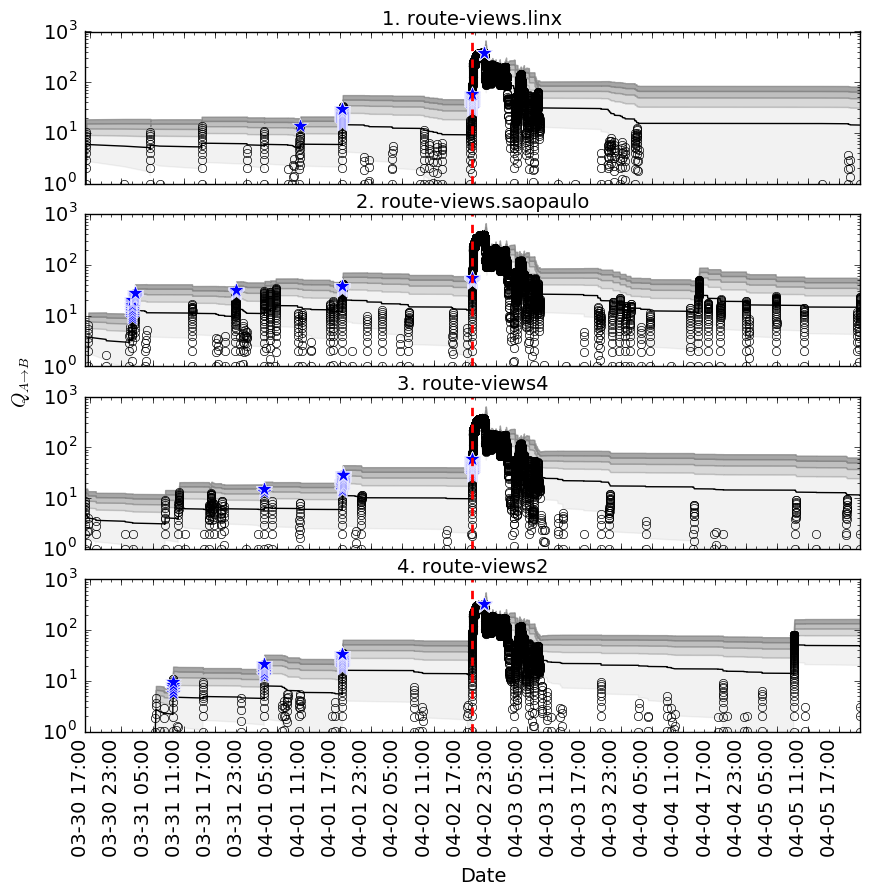

In [28]:
list_collectors = number_of_feeders[:4]

row = len(list_collectors)
col = 1

fig, axes = plt.subplots(row, col, sharex=True, sharey=True) 
fig.subplots_adjust(hspace=0.2, wspace=0.05)

count = 0

for collector in list_collectors: #final_dic:
    
    print collector

    # print index_x, index_y
    ax = axes[count]
    ax.set_title(str(count + 1) + '. ' + collector, fontsize=14) 
    
    if dic[collector] != []:

        time_array = np.array(dic[collector])[:,0]

        q = 0
        r = 1/300 # 0.05, 0.01, 1/300 + 0.0033
        q_array = []
        delta_array = []

        for index in range(1, len(time_array)):
            delta = (time_array[index] - time_array[index-1]).seconds
            # print delta
            delta_array.append(delta)
            exponential_term = (2**(-r*delta))*q
            q = 1 + exponential_term
            q_array.append(q)

        delta_array = np.array(delta_array)
        # print np.max(delta_array), np.min(delta_array)

        q_array = np.array(q_array)
        # print np.max(q_array), np.min(q_array)


        # print len(time_array[1:])
        s = pd.Series(q_array, index=time_array[1:])
        
        window_length = 200
        mean = s.ewm(span=window_length, min_periods=1).mean()
        sd = s.ewm(span=window_length, min_periods=1).std()

        x = s.index.to_pydatetime()
        y = s.values

        array_means = mean.values
        array_stds = sd.values

        #ax.plot(x, y, color='black')
        ax.plot(x, y, linestyle="None", marker="o", mfc="None", markeredgecolor="black")
        ax.set_yscale("log")
        # ax.plot(x, y, linestyle="None", marker="o", mfc="None", markeredgecolor="black", markersize=3)
        # ax.plot(x, array_means, color='blue', linewidth=1.5)
        
        ax.plot(x, array_means, color="black", linewidth=1.0)
        print 'rmse: ', np.sqrt(mean_squared_error(y, array_means))

        # Band scale
        sigma = 1.0
        ax.fill_between(x, array_means - sigma*array_stds, array_means + sigma*array_stds, color="gray", alpha=0.10)

        ax.fill_between(x, array_means + sigma*array_stds, array_means + 2*sigma*array_stds, color="gray", alpha=0.30)
        # ax.fill_between(x, array_means - sigma*array_stds, array_means - 2*sigma*array_stds, color="gray", alpha=0.30)

        ax.fill_between(x, array_means + 2*sigma*array_stds, array_means + 3*sigma*array_stds, color="gray", alpha=0.50)
        # ax.fill_between(x, array_means - 2*sigma*array_stds, array_means - 3*sigma*array_stds, color="gray", alpha=0.50)

        ax.fill_between(x, array_means + 3*sigma*array_stds, array_means + 4*sigma*array_stds, color="gray", alpha=0.70)
        # ax.fill_between(x, array_means - 3*sigma*array_stds, array_means - 4*sigma*array_stds, color="gray", alpha=0.70)

        anomalies_index = y >= (mean + 2*sigma*sd)
        # print 'stars: ', x[anomalies_index], y[anomalies_index]
        ax.plot(x[anomalies_index], y[anomalies_index], linestyle="None", marker="*", mfc="blue", markeredgecolor="white", markersize=12)  
        
        
        # Assign font size
        for label in ([ax.xaxis.label, ax.yaxis.label]):
            label.set_fontsize(14)

        # x axis
        for tl in ax.get_xticklabels():
            tl.set_fontsize(14)

        # y axis
        for tl in ax.get_yticklabels():
            tl.set_fontsize(14)

        # Change ticks space
        ax.tick_params(axis="both", which="major", pad=5)  

        ax.set_ylim(bottom=1)
        ax.set_ylim(auto=True)

        ax.xaxis.set_major_locator(dates.HourLocator(byhour=None, interval=6, tz=None))
        ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%d %H:%M"))
        ax.xaxis.set_minor_locator(dates.HourLocator(byhour=None, interval=2, tz=None))

        ax.axvline(x=datetime(2014, 4, 2, 18, 26, 0), color='red', linestyle='--', linewidth=2.0)

    count += 1
    
fig.autofmt_xdate(rotation=90) 
    

fig.text(0.5, 0.055, 'Date', va="center", rotation="horizontal", fontsize=14)
fig.text(0.05, 0.55, r'$Q_{A \to B}$', va="center", rotation="vertical", fontsize=14)

# fit subplots and save fig
size = 10
fig.set_size_inches(w=size, h=1.0*size) # size/1.618

if len(list_collectors) % 2 != 0:
    ax = axes[int(len(list_collectors)/2), 1]
    ax.set_visible(False)


plt.show()

## Remaning collectors

route-views.eqix
rmse:  21.2332512794
route-views6
rmse:  9.15759062449
route-views.isc
rmse:  22.8182191784
route-views3
rmse:  22.1673635268
route-views.sydney
rmse:  13.4184824452
route-views.jinx
rmse:  2.70571633726
route-views.telxatl
rmse:  21.0890085858
route-views.nwax
rmse:  19.3897893353
route-views.wide
rmse:  18.7227340389
route-views.perth
route-views.kixp
route-views.soxrs
rmse:  0.465810334828


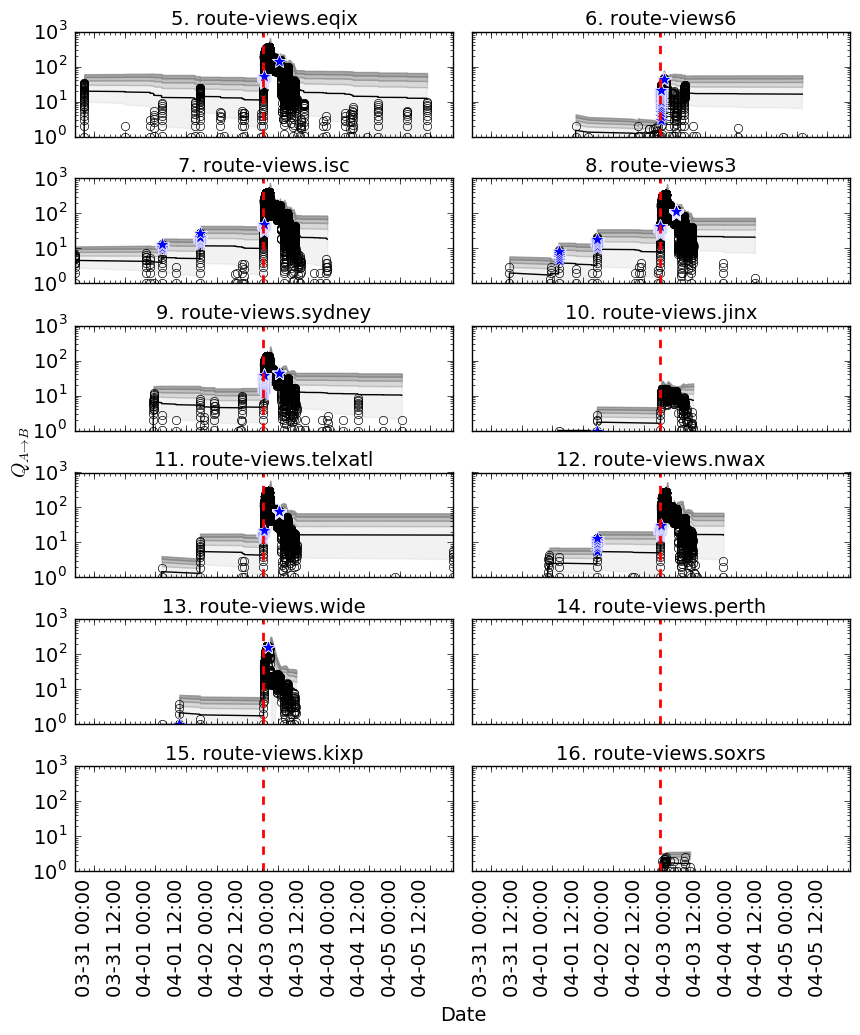

In [35]:
list_collectors = number_of_feeders[4:]

if len(list_collectors) % 2 != 0: # Odd
    row = int(len(list_collectors)/2) + 1
else: # Even
    row = int(len(list_collectors)/2)
col = 2

fig, axes = plt.subplots(row, col, sharex=True, sharey=True) 
fig.subplots_adjust(hspace=0.4, wspace=0.05)

count = 0

for collector in list_collectors: #final_dic:
    
    print collector

    index_x = int(count/2)
    if count % 2 == 0:
        index_y = 0
    else:
        index_y = 1

    # print index_x, index_y
    ax = axes[index_x, index_y] 
    ax.set_title(str(count + 5) + '. ' + collector, fontsize=14) 
    
    if dic[collector] != []:

        time_array = np.array(dic[collector])[:,0]

        q = 0
        r = 1/300 # 0.05, 0.01
        q_array = []
        delta_array = []

        for index in range(1, len(time_array)):
            delta = (time_array[index] - time_array[index-1]).seconds
            # print delta
            delta_array.append(delta)
            exponential_term = (2**(-r*delta))*q
            q = 1 + exponential_term
            q_array.append(q)

        delta_array = np.array(delta_array)
        # print np.max(delta_array), np.min(delta_array)

        q_array = np.array(q_array)
        # print np.max(q_array), np.min(q_array)


        # print len(time_array[1:])
        s = pd.Series(q_array, index=time_array[1:])
        
        window_length = 200
        mean = s.ewm(span=window_length, min_periods=1).mean()
        sd = s.ewm(span=window_length, min_periods=1).std()

        x = s.index.to_pydatetime()
        y = s.values

        array_means = mean.values
        array_stds = sd.values

        #ax.plot(x, y, color='black')
        ax.plot(x, y, linestyle="None", marker="o", mfc="None", markeredgecolor="black")
        ax.set_yscale("log")

        
        ax.plot(x, array_means, color="black", linewidth=1.0)
        print 'rmse: ', np.sqrt(mean_squared_error(y, array_means))

        # Band scale
        sigma = 1.0
        ax.fill_between(x, array_means - sigma*array_stds, array_means + sigma*array_stds, color="gray", alpha=0.10)

        ax.fill_between(x, array_means + sigma*array_stds, array_means + 2*sigma*array_stds, color="gray", alpha=0.30)
        # ax.fill_between(x, array_means - sigma*array_stds, array_means - 2*sigma*array_stds, color="gray", alpha=0.30)

        ax.fill_between(x, array_means + 2*sigma*array_stds, array_means + 3*sigma*array_stds, color="gray", alpha=0.50)
        # ax.fill_between(x, array_means - 2*sigma*array_stds, array_means - 3*sigma*array_stds, color="gray", alpha=0.50)

        ax.fill_between(x, array_means + 3*sigma*array_stds, array_means + 4*sigma*array_stds, color="gray", alpha=0.70)
        # ax.fill_between(x, array_means - 3*sigma*array_stds, array_means - 4*sigma*array_stds, color="gray", alpha=0.70)

        anomalies_index = y >= (mean + 2*sigma*sd)
        # print anomalies_index
        # print 'stars: ', x[anomalies_index], y[anomalies_index], 
        ax.plot(x[anomalies_index], y[anomalies_index], linestyle="None", marker="*", mfc="blue", markeredgecolor="white", markersize=10)  

    # Assign font size
    for label in ([ax.xaxis.label, ax.yaxis.label]):
        label.set_fontsize(14)

    # x axis
    for tl in ax.get_xticklabels():
        tl.set_fontsize(14)

    # y axis
    for tl in ax.get_yticklabels():
        tl.set_fontsize(14)

    # Change ticks space
    ax.tick_params(axis="both", which="major", pad=5)  

    ax.set_ylim(bottom=1)
    ax.set_ylim(auto=True)

    ax.xaxis.set_major_locator(dates.HourLocator(byhour=None, interval=12, tz=None))
    ax.xaxis.set_major_formatter(dates.DateFormatter("%m-%d %H:%M"))
    ax.xaxis.set_minor_locator(dates.HourLocator(byhour=None, interval=2, tz=None))
    ax.axvline(x=datetime(2014, 4, 2, 18, 26, 0), color='red', linestyle='--', linewidth=2.0)
        
    count += 1
    
fig.autofmt_xdate(rotation=90) 
    

fig.text(0.49, 0.08, 'Date', va="center", rotation="horizontal", fontsize=14)
fig.text(0.06, 0.55, r'$Q_{A \to B}$', va="center", rotation="vertical", fontsize=14)

# fit subplots and save fig
size = 10
fig.set_size_inches(w=size, h=1.2*size) # size/1.618

if len(list_collectors) % 2 != 0:
    ax = axes[int(len(list_collectors)/2), 1]
    ax.set_visible(False)

plt.show()

## Performance Analysis

In [39]:
import helper_functions

## Ground truth
date_time_start = '2014-03-30 12:13:04' 
date_time_end = '2014-04-05 16:52:15' 

date_of_incident = ['2014-04-02 18:26:00']
dates_list = [datetime.strptime(date, '%Y-%m-%d %H:%M:%S') for date in date_of_incident]


granularity = 3
print 'granularity', granularity

# Map the Ground truth
o = helper_functions.map_ground_truth_to_regular_espace(date_time_start, date_time_end, dates_list, granularity) 

list_collectors = number_of_feeders

for collector in list_collectors: #final_dic:
    
    print collector
    
    if dic[collector] != []:
    
        ############
        ## Q measure
        ############

        time_array = np.array(dic[collector])[:,0]

        q = 0
        r = 1/300 # 0.05, 0.01
        q_array = []
        delta_array = []

        for index in range(1, len(time_array)):
            delta = (time_array[index] - time_array[index-1]).seconds
            # print delta
            delta_array.append(delta)
            exponential_term = (2**(-r*delta))*q
            q = 1 + exponential_term
            q_array.append(q)

        delta_array = np.array(delta_array)
        # print np.max(delta_array), np.min(delta_array)

        q_array = np.array(q_array)
        # print np.max(q_array), np.min(q_array)
        
        # print len(time_array[1:])
        s = pd.Series(q_array, index=time_array[1:])

        window_length = 200
        mean = s.ewm(span=window_length, min_periods=1).mean()
        sd = s.ewm(span=window_length, min_periods=1).std()

        array_means = mean.values
        array_stds = sd.values
        
        # Based on Q measure
        o_prime_q = helper_functions.map_signal_to_regular_space_one_shot(time_array[1:], q_array, array_means, array_stds, date_time_start, date_time_end, granularity)
        # print o_prime_q, type(o_prime_q)
        
        
        ##############
        # Volume masure
        ###############
        
        x = np.array(dic[collector])[:,0]
        y = np.array(dic[collector])[:,1]
        
        # Convert data in time series for calculations
        s = pd.Series(y, index=x)

        window_length = 200
        mean = s.ewm(span=window_length, min_periods=1).mean()
        sd = s.ewm(span=window_length, min_periods=1).std()
        
        array_means = mean.values
        array_stds = sd.values

        # Based on volume measure
        o_prime_volume = helper_functions.map_signal_to_regular_space_one_shot(x, y, array_means, array_stds, date_time_start, date_time_end, granularity)
                
        ###################
        # ML features
        ###################

        precision = []
        recall = []
        false_positive_rate = []
        true_positive_rate = []
        f1_rate = []
        

        # Calculate metrics
        tp = np.dot(o, o_prime_q) 
        fp = np.dot(1-o, o_prime_q)
        tn = np.dot(1-o, 1-o_prime_q)
        fn = np.dot(o, 1-o_prime_q)
        pr = tp/(tp + fp)
        rc = tp/(tp + fn)
        fpr = fp/(fp + tn)
        tpr = tp/(tp + fn)
        f1 = 2*((pr*rc)/(pr+rc))

        precision.append(pr)
        recall.append(rc)
        false_positive_rate.append(fpr)
        true_positive_rate.append(tpr)
        f1_rate.append(f1)
        
        
        print 'q: ', 'pr: ', precision, 're: ', recall, 'f1: ', f1_rate, 'fpr: ', false_positive_rate, 'tpr: ', true_positive_rate
        
        #######################
        # volume based metric
        #######################

        precision_volume = []
        recall_volume = []
        false_positive_rate_volume = []
        true_positive_rate_volume = []
        f1_rate_volume = []

    
        # Calculate metrics
        tp = np.dot(o, o_prime_volume) 
        fp = np.dot(1-o, o_prime_volume)
        tn = np.dot(1-o, 1-o_prime_volume)
        fn = np.dot(o, 1-o_prime_volume)
        pr = tp/(tp + fp)
        rc = tp/(tp + fn)
        fpr = fp/(fp + tn)
        tpr = tp/(tp + fn)
        f1 = 2*((pr*rc)/(pr+rc))

        precision_volume.append(pr)
        recall_volume.append(rc)
        false_positive_rate_volume.append(fpr)
        true_positive_rate_volume.append(tpr)
        f1_rate_volume.append(f1)
        
        print 'volume: ', 'pr: ', precision_volume, 're: ', recall_volume, 'f1: ', f1_rate_volume, 'fpr: ', false_positive_rate_volume, 'tpr: ', true_positive_rate_volume

granularity 3
route-views.linx
q:  pr:  [0.25] re:  [1.0] f1:  [0.40000000000000002] fpr:  [0.061224489795918366] tpr:  [1.0]
volume:  pr:  [0.066666666666666666] re:  [1.0] f1:  [0.125] fpr:  [0.2857142857142857] tpr:  [1.0]
route-views.saopaulo
q:  pr:  [0.25] re:  [1.0] f1:  [0.40000000000000002] fpr:  [0.061224489795918366] tpr:  [1.0]
volume:  pr:  [0.037037037037037035] re:  [1.0] f1:  [0.071428571428571425] fpr:  [0.53061224489795922] tpr:  [1.0]
route-views4
q:  pr:  [0.33333333333333331] re:  [1.0] f1:  [0.5] fpr:  [0.040816326530612242] tpr:  [1.0]
volume:  pr:  [0.071428571428571425] re:  [1.0] f1:  [0.13333333333333333] fpr:  [0.26530612244897961] tpr:  [1.0]
route-views2


/nfs/nfs5-insecure/home/insecure-ro/software/rhel6_x86_64/python2.7.10/lib/python2.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in double_scalars


q:  pr:  [0.0] re:  [0.0] f1:  [nan] fpr:  [0.081632653061224483] tpr:  [0.0]
volume:  pr:  [0.058823529411764705] re:  [1.0] f1:  [0.1111111111111111] fpr:  [0.32653061224489793] tpr:  [1.0]
route-views.eqix
q:  pr:  [0.5] re:  [1.0] f1:  [0.66666666666666663] fpr:  [0.020408163265306121] tpr:  [1.0]
volume:  pr:  [0.10000000000000001] re:  [1.0] f1:  [0.18181818181818182] fpr:  [0.18367346938775511] tpr:  [1.0]
route-views6
q:  pr:  [1.0] re:  [1.0] f1:  [1.0] fpr:  [0.0] tpr:  [1.0]
volume:  pr:  [0.33333333333333331] re:  [1.0] f1:  [0.5] fpr:  [0.040816326530612242] tpr:  [1.0]
route-views.isc
q:  pr:  [0.33333333333333331] re:  [1.0] f1:  [0.5] fpr:  [0.040816326530612242] tpr:  [1.0]
volume:  pr:  [0.1111111111111111] re:  [1.0] f1:  [0.19999999999999998] fpr:  [0.16326530612244897] tpr:  [1.0]
route-views3
q:  pr:  [0.25] re:  [1.0] f1:  [0.40000000000000002] fpr:  [0.061224489795918366] tpr:  [1.0]
volume:  pr:  [0.125] re:  [1.0] f1:  [0.22222222222222221] fpr:  [0.1428571428

/nfs/nfs5-insecure/home/insecure-ro/software/rhel6_x86_64/python2.7.10/lib/python2.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in long_scalars


q:  pr:  [nan] re:  [0.0] f1:  [nan] fpr:  [0.0] tpr:  [0.0]
volume:  pr:  [0.5] re:  [1.0] f1:  [0.66666666666666663] fpr:  [0.020408163265306121] tpr:  [1.0]
route-views.telxatl
q:  pr:  [0.5] re:  [1.0] f1:  [0.66666666666666663] fpr:  [0.020408163265306121] tpr:  [1.0]
volume:  pr:  [0.20000000000000001] re:  [1.0] f1:  [0.33333333333333337] fpr:  [0.081632653061224483] tpr:  [1.0]
route-views.nwax
q:  pr:  [0.5] re:  [1.0] f1:  [0.66666666666666663] fpr:  [0.020408163265306121] tpr:  [1.0]
volume:  pr:  [0.16666666666666666] re:  [1.0] f1:  [0.2857142857142857] fpr:  [0.10204081632653061] tpr:  [1.0]
route-views.wide
q:  pr:  [0.0] re:  [0.0] f1:  [nan] fpr:  [0.020408163265306121] tpr:  [0.0]
volume:  pr:  [0.25] re:  [1.0] f1:  [0.40000000000000002] fpr:  [0.061224489795918366] tpr:  [1.0]
route-views.perth
route-views.kixp
route-views.soxrs
q:  pr:  [nan] re:  [0.0] f1:  [nan] fpr:  [0.0] tpr:  [0.0]
volume:  pr:  [nan] re:  [0.0] f1:  [nan] fpr:  [0.0] tpr:  [0.0]


/nfs/nfs5-insecure/home/insecure-ro/software/rhel6_x86_64/python2.7.10/lib/python2.7/site-packages/ipykernel_launcher.py:134: RuntimeWarning: invalid value encountered in long_scalars
